# 3章 ニューラルネット

## 3.2 活性化関数

### 3.2.2 ステップ関数の実装

In [1]:
function step_function(x)
    map(Int, x .> 0)
end

step_function (generic function with 1 method)

### 3.2.3 ステップ関数のグラフ

In [2]:
using Gadfly

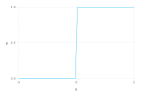

In [3]:
x = linspace(-5.0, 5.0)
y = step_function(x)
plot(x=x, y=y, Geom.line)

### 3.2.4 シグモイド関数の実装

In [4]:
function sigmoid(x)
    1.0 ./ (1.0 .+ exp(-x))
end

sigmoid (generic function with 1 method)

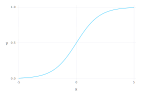

In [5]:
x = linspace(-5.0, 5.0)
y = sigmoid(x)
plot(x=x, y=y, Geom.line)

### 3.2.5 シグモイド関数とステップ関数の比較

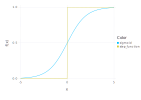

In [6]:
plot([sigmoid, step_function], -5.0, 5.0, color=repeat(["sigmoid", "step_function"], outer=3))

### 3.2.7 ReLU関数

In [7]:
function relu(x)
    max(0, x)
end

relu (generic function with 1 method)

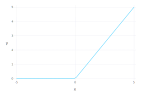

In [8]:
x = linspace(-5.0, 5.0)
y = relu(x)
plot(x=x, y=y, Geom.line)

## 3.3 多次元配列の計算

### 3.3.1 多次元配列

In [9]:
A = [1, 2, 3, 4]

4-element Array{Int64,1}:
 1
 2
 3
 4

In [10]:
ndims(A)

1

In [11]:
size(A)

(4,)

In [12]:
size(A)[1]

4

In [13]:
B = [1 2; 3 4; 5 6]

3×2 Array{Int64,2}:
 1  2
 3  4
 5  6

In [14]:
ndims(B)

2

In [15]:
size(B)

(3,2)

### 3.3.2 行列の内積

In [16]:
A = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [17]:
B = [5 6; 7 8]

2×2 Array{Int64,2}:
 5  6
 7  8

In [18]:
A * B

2×2 Array{Int64,2}:
 19  22
 43  50

In [19]:
A = [1 2 3; 4 5 6]

2×3 Array{Int64,2}:
 1  2  3
 4  5  6

In [20]:
B = [1 2; 3 4; 5 6]

3×2 Array{Int64,2}:
 1  2
 3  4
 5  6

In [21]:
A * B

2×2 Array{Int64,2}:
 22  28
 49  64

In [22]:
A = [1 2; 3 4; 5 6]

3×2 Array{Int64,2}:
 1  2
 3  4
 5  6

In [23]:
B = [7, 8]

2-element Array{Int64,1}:
 7
 8

In [24]:
A * B

3-element Array{Int64,1}:
 23
 53
 83

### 3.3.3 ニューラルネットワークの内積

In [25]:
X = [1, 2]

2-element Array{Int64,1}:
 1
 2

In [26]:
W = [1 3 5; 2 4 6]

2×3 Array{Int64,2}:
 1  3  5
 2  4  6

In [27]:
# Y = X * W
Y = X' * W

1×3 Array{Int64,2}:
 5  11  17

※ Julia の1次元配列はベクトル（縦ベクトル）なので、↓の方が自然

In [28]:
X = [1, 2]

2-element Array{Int64,1}:
 1
 2

In [29]:
W = [1 2; 3 4; 5 6]

3×2 Array{Int64,2}:
 1  2
 3  4
 5  6

In [30]:
Y = W * X

3-element Array{Int64,1}:
  5
 11
 17

## 3.4 3層ニューラルネットワークの実装

### 3.4.2 各層における信号伝達の実装

In [31]:
X = [1.0, 0.5]

2-element Array{Float64,1}:
 1.0
 0.5

In [32]:
W1 = [0.1 0.2; 0.3 0.4; 0.5 0.6]

3×2 Array{Float64,2}:
 0.1  0.2
 0.3  0.4
 0.5  0.6

In [33]:
B1 = [0.1, 0.2, 0.3]

3-element Array{Float64,1}:
 0.1
 0.2
 0.3

In [34]:
A1 = W1 * X .+ B1

3-element Array{Float64,1}:
 0.3
 0.7
 1.1

In [35]:
Z1 = sigmoid(A1)

3-element Array{Float64,1}:
 0.574443
 0.668188
 0.75026 

In [36]:
W2 = [0.1 0.2 0.3; 0.4 0.5 0.6]

2×3 Array{Float64,2}:
 0.1  0.2  0.3
 0.4  0.5  0.6

In [37]:
B2 = [0.1, 0.2]

2-element Array{Float64,1}:
 0.1
 0.2

In [38]:
A2 = W2 * Z1 .+ B2

2-element Array{Float64,1}:
 0.51616
 1.21403

In [39]:
Z2 = sigmoid(A2)

2-element Array{Float64,1}:
 0.626249
 0.771011

In [40]:
W3 = [0.1 0.2; 0.3 0.4]

2×2 Array{Float64,2}:
 0.1  0.2
 0.3  0.4

In [41]:
B3 = [0.1, 0.2]

2-element Array{Float64,1}:
 0.1
 0.2

In [42]:
A3 = W3 * Z2 .+ B3

2-element Array{Float64,1}:
 0.316827
 0.696279

In [43]:
# `identity` は Julia 標準関数
Y = identity(A3)

2-element Array{Float64,1}:
 0.316827
 0.696279

### 3.4.3 実装のまとめ

In [44]:
function init_network()
    network = Dict(
        :W1 => [0.1 0.2; 0.3 0.4; 0.5 0.6],
        :b1 => [0.1, 0.2, 0.3],
        :W2 => [0.1 0.2 0.3; 0.4 0.5 0.6],
        :b2 => [0.1, 0.2],
        :W3 => [0.1 0.2; 0.3 0.4],
        :b3 => [0.1, 0.2]
    )
    network
end

init_network (generic function with 1 method)

In [45]:
function forward(network, x)
    W1, W2, W3 = network[:W1], network[:W2], network[:W3]
    b1, b2, b3 = network[:b1], network[:b2], network[:b3]
    
    a1 = W1 * x .+ b1
    z1 = sigmoid(a1)
    a2 = W2 * z1 .+ b2
    z2 = sigmoid(a2)
    a3 = W3 * z2 .+ b3
    y = identity(a3)
    
    y
end

forward (generic function with 1 method)

In [46]:
network = init_network()
x = [1.0, 0.5]
y = forward(network, x)
println(y)

[0.316827,0.696279]


## 3.5 出力層の設計

### 3.5.1 恒等関数とソフトマックス関数

In [47]:
function softmax0{T<:AbstractFloat}(a::AbstractVector{T})
    exp_a = exp(a)
    sum_exp_a = sum(exp_a)
    exp_a ./ sum_exp_a
end

softmax0 (generic function with 1 method)

In [48]:
a = [0.3, 2.9, 4.0]
softmax0(a)

3-element Array{Float64,1}:
 0.0182113
 0.245192 
 0.736597 

### 3.5.2 ソフトマックス関数の実装上の注意

In [49]:
function softmax{T<:AbstractFloat}(a::AbstractVector{T})
    c = maximum(a)  # オーバーフロー対策
    exp_a = exp(a .- c)
    sum_exp_a = sum(exp_a)
    exp_a ./ sum_exp_a
end

function softmax{T<:AbstractFloat}(a::AbstractMatrix{T})
    mapslices(softmax, a, 1)
end

softmax (generic function with 2 methods)

In [50]:
a = [0.3, 2.9, 4.0]
softmax(a)

3-element Array{Float64,1}:
 0.0182113
 0.245192 
 0.736597 

In [51]:
a = [1010.0, 1000.0, 990.0]
softmax0(a)

3-element Array{Float64,1}:
 NaN
 NaN
 NaN

In [52]:
a = [1010.0, 1000.0, 990.0]
softmax(a)

3-element Array{Float64,1}:
 0.999955  
 4.53979e-5
 2.06106e-9

## 3.6 手書き数字認識

### 3.6.1 MNIST データセット

※ Juliaでは追加パッケージでMNISTデータセットを提供している。

In [53]:
# Pkg.add("MNIST")
using MNIST

In [54]:
x_train, t_train = traindata();
x_test, t_test = testdata();

In [55]:
size(x_train)

(784,60000)

In [56]:
size(t_train)

(60000,)

In [57]:
size(x_test)

(784,10000)

In [58]:
size(t_test)

(10000,)

※ `MNIST` パッケージの `traindata()` `testdata()` には引数は存在しない。  
　データは「normalizeなし（数値は全て0.0〜255.0）」「画像はflatten（28x28x1 のグレースケール画像として利用するには reshape 必要）」「one_hot_labelではない（ラベルは0.0〜9.0の数値）」となっている。

In [59]:
import Images

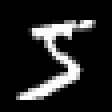

In [60]:
Images.grayim(reshape(collect(UInt8, x_train[:, 1]), 28,28)')

In [61]:
t_train[1]

5.0

### 3.6.2 ニューラルネットワークの推論処理

In [62]:
# Pkg.add("JLD")
using JLD

In [63]:
network = load("sample_network.jld")

Dict{String,Any} with 6 entries:
  "W2" => Float32[-0.10694 0.299116 … 0.100016 -0.0222066; 0.0159125 -0.0332223…
  "W3" => Float32[-0.421736 -0.524321 … -0.544508 1.07228; 0.689445 -0.143625 ……
  "b3" => Float32[-0.0602398,0.00932628,-0.0135995,0.0216713,0.0107372,0.066197…
  "W1" => Float32[-2.90686f-5 -1.88106f-5 … -0.000386883 1.09472f-6; -3.09976f-…
  "b2" => Float32[-0.0147111,-0.0721513,-0.00155692,0.121997,0.116033,-0.007549…
  "b1" => Float32[-0.0675032,0.0695926,-0.0273047,0.0225609,-0.220015,-0.220388…

In [75]:
size(network["W1"])

(50,784)

In [65]:
function predict(network, x)
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = W1 * x .+ b1
    z1 = sigmoid(a1)
    a2 = W2 * z1 .+ b2
    z2 = sigmoid(a2)
    a3 = W3 * z2 .+ b3
    y = softmax(a3)

    y
end

predict (generic function with 1 method)

In [76]:
predict(network, x_train[:, 1])

10-element Array{Float64,1}:
 0.0106677  
 0.000158301
 0.000430344
 0.215528   
 5.69069e-6 
 0.7676     
 3.01649e-5 
 0.00311578 
 0.00166548 
 0.000798537

In [77]:
indmax(predict(network, x_train[:, 1])) - 1

5

In [68]:
y1 = predict(network, x_test[:, 1])

10-element Array{Float64,1}:
 8.44125e-5 
 2.63506e-6 
 0.000715494
 0.00125863 
 1.1728e-6  
 4.49908e-5 
 1.62693e-8 
 0.997065   
 9.37447e-6 
 0.000818312

In [69]:
predict(network, x_train[:, 1])

10-element Array{Float64,1}:
 0.0106677  
 0.000158301
 0.000430344
 0.215528   
 5.69069e-6 
 0.7676     
 3.01649e-5 
 0.00311578 
 0.00166548 
 0.000798537

In [70]:
indmax(predict(network, x_train[:, 1]))-1

5

In [71]:
t_train[1]

5.0

In [72]:
y = predict(network, x_test)

10×10000 Array{Float64,2}:
 8.44125e-5   0.00483633  1.03583e-7   …  0.000624385  0.000428828
 2.63506e-6   0.00110459  0.988973        0.000767557  2.0043e-6  
 0.000715494  0.944252    0.00428949      0.000124992  0.00254057 
 0.00125863   0.0143091   0.00178321      0.000642085  2.01689e-6 
 1.1728e-6    5.69896e-7  0.000131734     0.00126703   0.000559177
 4.49908e-5   0.00667604  0.000759407  …  0.907499     0.00031262 
 1.62693e-8   0.0275334   0.00046891      0.00274028   0.996148   
 0.997065     1.27084e-6  0.00226997      3.81287e-5   4.34994e-7 
 9.37447e-6   0.00128642  0.00123787      0.0862065    6.37568e-6 
 0.000818312  4.78647e-8  8.67147e-5      8.9935e-5    3.77514e-7 

In [73]:
p = reshape(mapslices(indmax, y, 1), (length(t_test),)) .- 1

10000-element Array{Int64,1}:
 7
 2
 1
 0
 4
 1
 4
 9
 6
 9
 0
 6
 9
 ⋮
 5
 6
 7
 8
 9
 0
 1
 2
 3
 4
 5
 6

In [74]:
mean(p .== t_test)

0.9352

### 3.6.3 バッチ処理

…↑ですでに実施済。